#Question3


 


---
> Importing Required Packages









In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import datetime
from keras.datasets import cifar10
from tensorflow.keras import layers, Model


---
> Loading Datasets






In [2]:
(X_train,Y_train) , (X_test,Y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


---

> Determining Labels






In [3]:
cifar10_labels = ["airplane",
                 "automobile",
                 "bird",
                 "cat",
                 "deer",
                 "dog",
                 "frog",
                 "horse",
                 "ship",
                 "truck"]


---
> Data Preproccesing


In [4]:
# Data_Normalization
x_train = np.float32(X_train)/255
x_test = np.float32(X_test)/255

# Converting RGB to Grayscale
x_train = np.mean(x_train,axis=3)
x_test= np.mean(x_test,axis=3)

# Changing Size
x_train = x_train.reshape(-1,32*32)
x_test = x_test.reshape(-1,32*32)

---


> One-Hot-Encoding



In [5]:
# one-hot encoding
y_train = keras.utils.to_categorical(Y_train,10)
y_test = keras.utils.to_categorical(Y_test,10)

---
>Question3- PCA

In [6]:
X = np.concatenate((x_train, x_test), axis = 0)
x_tr = X - np.mean(X, axis = 0)
cov = x_tr.T.dot(x_tr)
e_values,e_vectors = np.linalg.eig(cov)

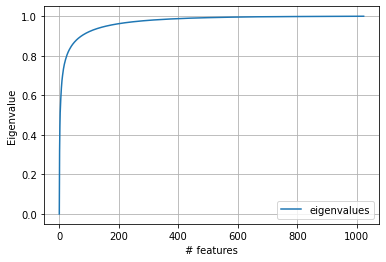

In [8]:
n = np.zeros(1024)
for i in range(1024):
    n[i] = sum(e_values[:i])
n = n / sum(e_values)
plt.plot(np.arange(0,1024), n, label = "eigenvalues")
plt.xlabel('# features')
plt.ylabel('Eigenvalue')
plt.legend()
plt.grid()
plt.show()

In [9]:
for i in range(1024):
    if sum(e_values[ : i]) >= 0.95 * sum(e_values):
        break

In [10]:
main_e_vectors = e_vectors[:,0:i]
x_dim_red = np.dot(main_e_vectors.T , x_tr.T ).T

In [11]:
x_dim_red.shape

(60000, 158)

In [12]:
x_train_dim_red = x_dim_red[:50000] 
x_test_dim_red  = x_dim_red[50000:]

In [16]:
model = tf.keras.Sequential()

model.add(layers.Dense(512, activation = 'relu', input_dim = i))

model.add(layers.Dense(256, activation = 'relu'))

model.add(layers.Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

start = datetime.datetime.now()
history = model.fit(x_train_dim_red, y_train, epochs=5,
                    validation_split = 0.2, batch_size = 128)
end = datetime.datetime.now()

Epoch 1/5
313/313 [==============================] - 2s 5ms/step - loss: 1.8378 - accuracy: 0.3516 - val_loss: 1.7223 - val_accuracy: 0.3943
Epoch 2/5
313/313 [==============================] - 1s 4ms/step - loss: 1.5770 - accuracy: 0.4462 - val_loss: 1.5994 - val_accuracy: 0.4409
Epoch 3/5
313/313 [==============================] - 1s 5ms/step - loss: 1.4125 - accuracy: 0.5041 - val_loss: 1.5296 - val_accuracy: 0.4629
Epoch 4/5
313/313 [==============================] - 1s 5ms/step - loss: 1.2878 - accuracy: 0.5494 - val_loss: 1.5160 - val_accuracy: 0.4792
Epoch 5/5
313/313 [==============================] - 1s 5ms/step - loss: 1.1698 - accuracy: 0.5904 - val_loss: 1.5230 - val_accuracy: 0.4865


In [17]:
Training_Time = end - start
print ('Training_Time:', Training_Time)

Training_Time: 0:00:07.859801


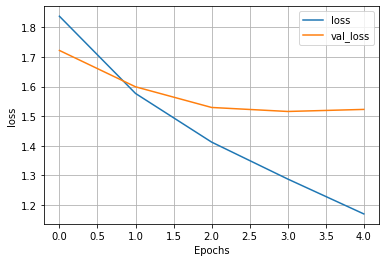

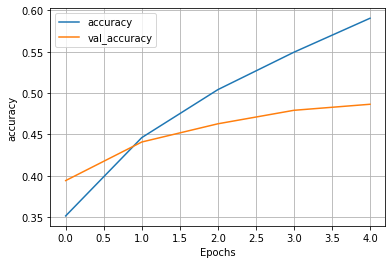

In [18]:
history = history.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.grid()
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['accuracy','val_accuracy'])
plt.grid()

In [19]:
test_loss, test_accuracy = model.evaluate(x_test_dim_red,y_test)
print('Test_loss:', test_loss)
print('Test_accuracy:', test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 1.5235 - accuracy: 0.4763
Test_loss: 1.5234885215759277
Test_accuracy: 0.4763000011444092


#Question3- Autoencoder


 

---


> Creating Auto-Encoder Model



In [ ]:
input = layers.Input(shape = (32*32, ))
encode = layers.Dense(512, activation = 'relu')(input)
encode = layers.Dense(256, activation = 'relu')(encode)
encode = layers.Dense(128, activation = 'relu')(encode)
decode = layers.Dense(256, activation = 'relu')(encode)
decode = layers.Dense(512, activation = 'relu')(decode)
decode = layers.Dense(1024, activation = 'sigmoid')(decode)
# encoding part 
encoder_model=Model(input,encode)
# autoencoder model
autoencoder_model=Model(input,decode)
autoencoder_model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1024)]            0         
                                                                 
 dense_54 (Dense)            (None, 512)               524800    
                                                                 
 dense_55 (Dense)            (None, 256)               131328    
                                                                 
 dense_56 (Dense)            (None, 128)               32896     
                                                                 
 dense_57 (Dense)            (None, 256)               33024     
                                                                 
 dense_58 (Dense)            (None, 512)               131584    
                                                                 
 dense_59 (Dense)            (None, 1024)              525

---


> Compiling Model



In [ ]:
autoencoder_model.compile(loss='MSE',optimizer='adam',
              metrics=['accuracy'])

---


> Training Model



In [ ]:
start = datetime.datetime.now()
autoencoder_model.fit(x_train,x_train,epochs=40,
             validation_split=0.2,batch_size=128)
end = datetime.datetime.now()

Epoch 1/40
313/313 [==============================] - 2s 6ms/step - loss: 0.0277 - accuracy: 0.0055 - val_loss: 0.0181 - val_accuracy: 0.0073
Epoch 2/40
313/313 [==============================] - 2s 5ms/step - loss: 0.0161 - accuracy: 0.0095 - val_loss: 0.0144 - val_accuracy: 0.0068
Epoch 3/40
313/313 [==============================] - 2s 5ms/step - loss: 0.0136 - accuracy: 0.0129 - val_loss: 0.0124 - val_accuracy: 0.0096
Epoch 4/40
313/313 [==============================] - 1s 4ms/step - loss: 0.0122 - accuracy: 0.0145 - val_loss: 0.0117 - val_accuracy: 0.0110
Epoch 5/40
313/313 [==============================] - 1s 4ms/step - loss: 0.0112 - accuracy: 0.0161 - val_loss: 0.0106 - val_accuracy: 0.0226
Epoch 6/40
313/313 [==============================] - 1s 4ms/step - loss: 0.0106 - accuracy: 0.0174 - val_loss: 0.0109 - val_accuracy: 0.0167
Epoch 7/40
313/313 [==============================] - 1s 4ms/step - loss: 0.0100 - accuracy: 0.0197 - val_loss: 0.0100 - val_accuracy: 0.0253
Epoch 

---
>Traning Time

In [ ]:
Training_Time = end - start
print ('Training_Time:', Training_Time)

Training_Time: 0:01:22.755954


---


> Results of Autoencoder



In [ ]:
x_train_enc = encoder_model.predict(x_train)
x_test_enc = encoder_model.predict(x_test)
x_test_dec = autoencoder_model.predict(x_test)

---


> Train model for encoded data



In [ ]:
model = tf.keras.Sequential()

model.add(layers.Dense(512, activation = 'relu', input_dim = 128))

model.add(layers.Dense(256, activation = 'relu'))

model.add(layers.Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

start = datetime.datetime.now()
history = model.fit(x_train_enc,y_train,epochs=10,
                    validation_split=0.2,batch_size=128)
end = datetime.datetime.now()

Epoch 1/10
313/313 [==============================] - 2s 6ms/step - loss: 1.9846 - accuracy: 0.2916 - val_loss: 1.9033 - val_accuracy: 0.3249
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 1.8192 - accuracy: 0.3552 - val_loss: 1.7825 - val_accuracy: 0.3708
Epoch 3/10
313/313 [==============================] - 1s 4ms/step - loss: 1.7413 - accuracy: 0.3809 - val_loss: 1.7294 - val_accuracy: 0.3880
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 1.6895 - accuracy: 0.4004 - val_loss: 1.6969 - val_accuracy: 0.3966
Epoch 5/10
313/313 [==============================] - 1s 3ms/step - loss: 1.6454 - accuracy: 0.4167 - val_loss: 1.6642 - val_accuracy: 0.4087
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 1.6111 - accuracy: 0.4269 - val_loss: 1.6500 - val_accuracy: 0.4121
Epoch 7/10
313/313 [==============================] - 1s 3ms/step - loss: 1.5738 - accuracy: 0.4409 - val_loss: 1.6222 - val_accuracy: 0.4203
Epoch 

---
> Training Time

In [ ]:
Training_Time = end - start
print ('Training_Time:', Training_Time)

Training_Time: 0:00:20.934145


---
> Plotting Loss & Accuracy Curves

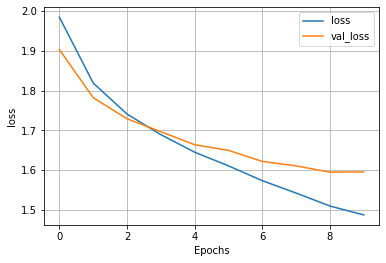

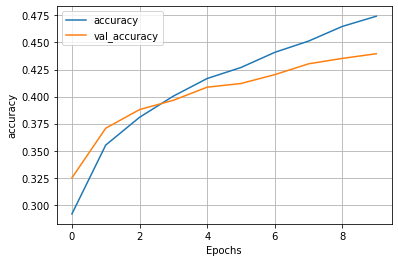

In [ ]:
history = history.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.grid()
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['accuracy','val_accuracy'])
plt.grid()

---
>Evaluating Model for Encoded Data

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_enc,y_test)
print('Test_loss:', test_loss)
print('Test_accuracy:', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 1.5926 - accuracy: 0.4464
Test_loss: 1.5926047563552856
Test_accuracy: 0.446399986743927
